Using the Heights and Weights as is we get the following:
MSE: 434.2125
R2-score: 0.7931

Using the Heights and Weights and second degree terms:
MSE: 423.6559
R2-score: 0.7981

Using BMI:
MSE: 484.8686
R2-score: 0.7690



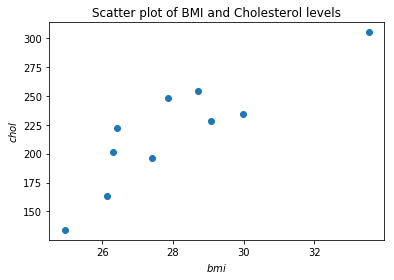

In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# use pandas to read in csv file
df = pd.read_csv('choldata.csv', header=None, delimiter=';')
# transport it to numpy 
choldata = df.values
# Divide into height and weight array, and cholestorol array
HWC = np.hsplit(choldata, np.array([2]))
HW = HWC[0]
C = HWC[1]

# Now we do linear regression, first using the "raw" data
linreg = LinearRegression()
linreg.fit(HW, C)
predicted = linreg.predict(HW)
print("Using the Heights and Weights as is we get the following:")
print("MSE: %.4f" % mean_squared_error(C, predicted))
print("R2-score: %.4f" % r2_score(C, predicted))
print("")

# Then we try to add in second degree terms
poly = PolynomialFeatures(2, interaction_only = True)
HW_poly = poly.fit_transform(HW)
linreg = LinearRegression()
linreg.fit(HW_poly, C)
predicted = linreg.predict(HW_poly)
print("Using the Heights and Weights and second degree terms:")
print("MSE: %.4f" % mean_squared_error(C, predicted))
print("R2-score: %.4f" % r2_score(C, predicted))
print("")

# Finally we do only the bmi
# Frist a function to compute bmi, it expects a row hw = [height, weight ]
def bmi(hw):
    return hw[1]/(hw[0]*hw[0])

BMI = np.apply_along_axis(bmi, 1, HW)
linreg = LinearRegression()
linreg.fit(BMI.reshape(-1,1), C)
predicted = linreg.predict(BMI.reshape(-1,1))
print("Using BMI:")
print("MSE: %.4f" % mean_squared_error(C, predicted))
print("R2-score: %.4f" % r2_score(C, predicted))
print("")

# first draw a line between the plotting x's and their predicted y's 
plt.scatter(np.apply_along_axis(bmi, 1, HW), C)
# Setup axis and labels
plt.xlabel(r'$bmi$')
plt.ylabel(r'$chol$')
plt.title(r'Scatter plot of BMI and Cholesterol levels')
plt.show()